# Multi Layer Perceptron

## 모델 구조

- **입력층**: `(5, 3)`  → 5개의 샘플, 각 샘플당 3개의 특징
- **은닉층 1**: `(3, 4)`  → 입력 크기 3, 출력 크기 4  
  - **바이어스 크기**: `(4,)` → 은닉층 1의 4개 노드 각각에 바이어스 적용
- **은닉층 2**: `(4, 3)`  → 입력 크기 4, 출력 크기 3  
  - **바이어스 크기**: `(3,)` → 은닉층 2의 3개 노드 각각에 바이어스 적용
- **출력층**: `(3, 2)`  → 입력 크기 3, 출력 크기 2  
  - **바이어스 크기**: `(2,)` → 출력층의 2개 노드 각각에 바이어스 적용

---

- **최종 출력**: `(5, 2)` → 5개의 샘플, 각 샘플당 2개의 예측 값

---

### 바이어스 크기 설명

각 층의 **바이어스(bias) 크기**는 해당 층의 **노드 수와 동일**합니다. 이는 **각 노드가 독립적으로 하나의 바이어스를 가지며, 이 바이어스를 더해 출력**을 조정하기 때문입니다.  
이 구조를 통해 각 노드는 자신의 바이어스를 활용하여 **출력을 개별적으로 조정**할 수 있습니다.


## 초기 파라미터 설정(5x3 matrix)

In [1]:
import numpy as np

batch_size = 5    # 데이터 레코드 수 (행 수)
input_size = 3    # 입력 특징 수 (열 수)

hidden_size1 = 4  # 첫 번째 은닉층 노드 수
hidden_size2 = 3  # 두 번째 은닉층 노드 수
output_size = 2   # 출력 노드 수 (각 레코드당 2개의 예측값)

# 랜덤 입력 데이터 생성 (배치 크기 x 입력 크기)
np.random.seed(0)  # 결과 재현성을 위해 시드 고정
X = np.random.randn(batch_size, input_size)  # (5, 3) 크기의 입력 데이터
y_true = np.random.randn(batch_size, output_size)  # 실제값 생성
X

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323]])

## Init. Weights and Biases

In [2]:
# 입력층 -> 첫 번째 은닉층
W1 = np.random.randn(input_size, hidden_size1)  # (3, 4)  # random normal => 가중치 초기화시 사용
B1 = np.random.randn(hidden_size1)              # (4,)

# 첫 번째 은닉층 -> 두 번째 은닉층
W2 = np.random.randn(hidden_size1, hidden_size2)
B2 = np.random.randn(hidden_size2)

# 두 번째 은닉층 -> 출력층
W3 = np.random.randn(hidden_size2, output_size)
B3 = np.random.randn(output_size)

W1

array([[-1.45436567,  0.04575852, -0.18718385,  1.53277921],
       [ 1.46935877,  0.15494743,  0.37816252, -0.88778575],
       [-1.98079647, -0.34791215,  0.15634897,  1.23029068]])

## 순전파 (Forward Pass)

In [3]:
# 1. 입력층에서 첫 번째 은닉층으로
hidden_layer1_input = np.dot(X, W1) + B1         # (5, 4) = (5, 3) * (3, 4) + (4,)
hidden_layer1_output = np.tanh(hidden_layer1_input)  # 활성화 함수 적용

# 2. 첫 번째 은닉층에서 두 번째 은닉층으로
hidden_layer2_input = np.dot(hidden_layer1_output, W2) + B2  # (5, 3) = (5, 4) * (4, 3) + (3,)
hidden_layer2_output = np.tanh(hidden_layer2_input)          # 활성화 함수 적용

# 3. 두 번째 은닉층에서 출력층으로
output_layer_input = np.dot(hidden_layer2_output, W3) + B3  # (5, 2) = (5, 3) * (3, 2) + (2,)
output_layer_output = np.tanh(output_layer_input)           # 활성화 함수 적용

# 결과 출력
print("Input (X):\n", X)
print("\nHidden Layer 1 Output:\n", hidden_layer1_output)
print("\nHidden Layer 2 Output:\n", hidden_layer2_output)
print("\nOutput Layer Output:\n", output_layer_output)

Input (X):
 [[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721 -0.10321885]
 [ 0.4105985   0.14404357  1.45427351]
 [ 0.76103773  0.12167502  0.44386323]]

Hidden Layer 1 Output:
 [[-0.99125299 -0.52637527 -0.31686264  0.98672627]
 [ 0.98952236  0.3315719  -0.166746   -0.44149455]
 [-0.1948163  -0.31977234 -0.50315354  0.39279984]
 [-0.96826531 -0.69220595 -0.09700809  0.84605437]
 [-0.54050289 -0.45268728 -0.31793322  0.50501049]]

Hidden Layer 2 Output:
 [[-0.56128338  0.99243674 -0.85716416]
 [-0.98632016 -0.9428962   0.97594679]
 [-0.90220597  0.88713785  0.34106319]
 [-0.27838456  0.98402977 -0.76363405]
 [-0.7073226   0.94689644 -0.24423053]]

Output Layer Output:
 [[-0.71804473 -0.96015232]
 [-0.73381284 -0.96631912]
 [-0.93091971 -0.98502809]
 [-0.73629633 -0.95562263]
 [-0.86084464 -0.97554547]]


In [4]:
# 손실 계산 (Mean Squared Error)
loss = np.mean((output_layer_output - y_true) ** 2)
print("Initial Loss:", loss)

Initial Loss: 2.7300612145982535


# 역전파 (Backpropagation)

In [5]:
# 1. 출력층에서 두 번째 은닉층으로의 기울기
dL_doutput = 2 * (output_layer_output - y_true) / batch_size
d_output_dinput = 1 - np.tanh(output_layer_input) ** 2  # tanh 미분
dL_dinput3 = dL_doutput * d_output_dinput

# 가중치와 바이어스에 대한 기울기 계산
dL_dW3 = np.dot(hidden_layer2_output.T, dL_dinput3)
dL_dB3 = np.sum(dL_dinput3, axis=0)

# 2. 두 번째 은닉층에서 첫 번째 은닉층으로의 기울기
dL_dhidden2 = np.dot(dL_dinput3, W3.T)
d_hidden2_dinput = 1 - np.tanh(hidden_layer2_input) ** 2
dL_dinput2 = dL_dhidden2 * d_hidden2_dinput

# 가중치와 바이어스에 대한 기울기 계산
dL_dW2 = np.dot(hidden_layer1_output.T, dL_dinput2)
dL_dB2 = np.sum(dL_dinput2, axis=0)

# 3. 첫 번째 은닉층에서 입력층으로의 기울기
dL_dhidden1 = np.dot(dL_dinput2, W2.T)
d_hidden1_dinput = 1 - np.tanh(hidden_layer1_input) ** 2
dL_dinput1 = dL_dhidden1 * d_hidden1_dinput

# 가중치와 바이어스에 대한 기울기 계산
dL_dW1 = np.dot(X.T, dL_dinput1)
dL_dB1 = np.sum(dL_dinput1, axis=0)

In [6]:
# 가중치와 바이어스 업데이트
learning_rate = 0.01  # 학습률 설정

W1 -= learning_rate * dL_dW1
B1 -= learning_rate * dL_dB1
W2 -= learning_rate * dL_dW2
B2 -= learning_rate * dL_dB2
W3 -= learning_rate * dL_dW3
B3 -= learning_rate * dL_dB3

In [7]:
# 업데이트 후 손실 계산
hidden_layer1_input = np.dot(X, W1) + B1
hidden_layer1_output = np.tanh(hidden_layer1_input)

hidden_layer2_input = np.dot(hidden_layer1_output, W2) + B2
hidden_layer2_output = np.tanh(hidden_layer2_input)

output_layer_input = np.dot(hidden_layer2_output, W3) + B3
output_layer_output = np.tanh(output_layer_input)

updated_loss = np.mean((output_layer_output - y_true) ** 2)
print("Updated Loss:", updated_loss)

Updated Loss: 2.725618925635357


# 함수 활용

In [6]:
import sys
sys.path.append('..')  # 상위 디렉토리를 path에 추가

from neural_networks.multi_layer_perceptron import MLP
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 데이터 생성
np.random.seed(0)
X = np.random.randn(5, 3)  # 5개 샘플, 3개 특성
y = np.random.randn(5, 2)  # 5개 샘플, 2개 출력

In [22]:
# 모델 생성
model = MLP(layer_sizes=[3, 4, 3, 2])  # 입력층(3) -> 은닉층1(4) -> 은닉층2(3) -> 출력층(2)

# 모델 학습
losses, weights = model.train(X, y, epochs=1000, learning_rate=0.01)

# 예측
predictions = model.predict(X)

# 최종 손실 출력
final_loss = np.mean((predictions - y) ** 2)
print(f"Final Loss: {final_loss:.6f}")

Epoch 0, Loss: 1.842673, Weight: 0.635406
Epoch 100, Loss: 0.641733, Weight: 0.276070
Epoch 200, Loss: 0.539884, Weight: 0.215159
Epoch 300, Loss: 0.514343, Weight: 0.187999
Epoch 400, Loss: 0.501246, Weight: 0.167919
Epoch 500, Loss: 0.491597, Weight: 0.149137
Epoch 600, Loss: 0.483388, Weight: 0.130147
Epoch 700, Loss: 0.476140, Weight: 0.110889
Epoch 800, Loss: 0.469787, Weight: 0.091763
Epoch 900, Loss: 0.464317, Weight: 0.073090
Final Loss: 0.459667


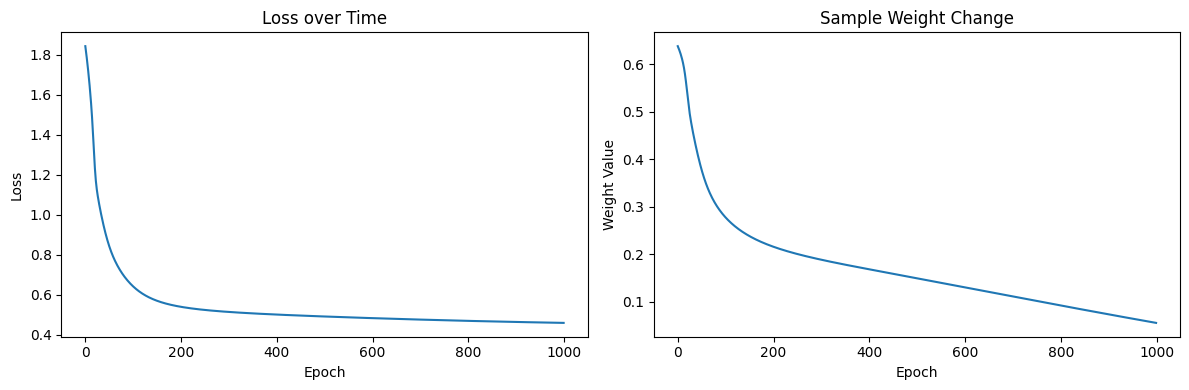

In [23]:
# 시각화
plt.figure(figsize=(12, 4))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 특정 가중치 변화 그래프
plt.subplot(1, 2, 2)
plt.plot(weights)
plt.title('Sample Weight Change')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')

plt.tight_layout()
plt.show()